In [1]:
from doped import analysis, plotting

In [2]:
from doped.pycdt.utils import parse_calculations
import numpy as np
import os

/Users/skavanagh/miniconda3/lib/python3.8/site-packages/pymatgen/analysis/phase_diagram.py:24: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
bulk_file_path = "Examples/Bulk_Supercell/vasp_ncl"
dielectric = np.array([[9.13, 0, 0],[0., 9.13, 0],[0, 0, 9.13]])
parsed_vac_Cd_dict = {}

for i in os.listdir("Examples"): # this loops through the folders in the current directory, and parses those that have "vac_1_Cd" in their name
    if 'vac_1_Cd' in i:
        print(i)
        defect_file_path = f"Examples/{i}/vasp_ncl" # assumes your final calculation results are in subfolders called vasp_ncl. E.g. vac_1_Cd_0/vasp_ncl/ etc
        defect_charge = int(i[-2:].replace("_",""))

        sdp = parse_calculations.SingleDefectParser.from_paths(defect_file_path, bulk_file_path,
                                            dielectric, defect_charge)
        print(f"Uncorrected energy: {sdp.defect_entry.uncorrected_energy:.3f} eV")
        bo = sdp.freysoldt_loader()
        sdp.get_stdrd_metadata()
        sdp.get_bulk_gap_data()
        sdp.run_compatibility()
        print("Defect entry corrections:")
        print(sdp.defect_entry.corrections)
        print(f"Corrected energy: {sdp.defect_entry.energy:.3f} eV", "\n")
        parsed_vac_Cd_dict[i] = sdp.defect_entry # Keep dictionary of parsed defect entries

vac_1_Cd_-2
Uncorrected energy: 7.661 eV
Defect entry corrections:
{'charge_correction': 0.7376460317828045, 'bandfilling_correction': -0.0, 'bandedgeshifting_correction': 0.0}
Corrected energy: 8.398 eV 

vac_1_Cd_0
Uncorrected energy: 4.166 eV
Defect entry corrections:
{'bandfilling_correction': -0.0, 'bandedgeshifting_correction': 0.0}
Corrected energy: 4.166 eV 

vac_1_Cd_-1
Uncorrected energy: 6.130 eV
Defect entry corrections:
{'charge_correction': 0.22517150393292082, 'bandfilling_correction': -0.0, 'bandedgeshifting_correction': 0.0}
Corrected energy: 6.355 eV 



In [4]:
bulk_file_path = "Examples/Bulk_Supercell/vasp_ncl"
dielectric = np.array([[9.13, 0, 0],[0., 9.13, 0],[0, 0, 9.13]])

for i in os.listdir("Examples"):
    if 'Int_Te' in i:
        print(i)
        defect_file_path = f"Examples/{i}/vasp_ncl"
        defect_charge = int(i[-2:].replace("_",""))

        sdp = parse_calculations.SingleDefectParser.from_paths(defect_file_path, bulk_file_path,
                                            dielectric, defect_charge)
        print(f"Uncorrected energy: {sdp.defect_entry.uncorrected_energy:.3f} eV")
        bo = sdp.kumagai_loader()
        sdp.get_stdrd_metadata()
        sdp.get_bulk_gap_data()
        sdp.run_compatibility()
        print("Defect entry corrections:")
        print(sdp.defect_entry.corrections)
        print(f"Corrected energy: {sdp.defect_entry.energy:.3f} eV", "\n")

Int_Te_3_2
Uncorrected energy: -7.105 eV
Defect entry corrections:
{'charge_correction': 0.8834518111049584, 'bandfilling_correction': -0.0, 'bandedgeshifting_correction': 0.0}
Corrected energy: -6.221 eV 



In [5]:
from doped.pycdt.corrections.finite_size_charge_correction import get_correction_kumagai


Final Kumagai correction is 0.883 eV


0.8834518111049584

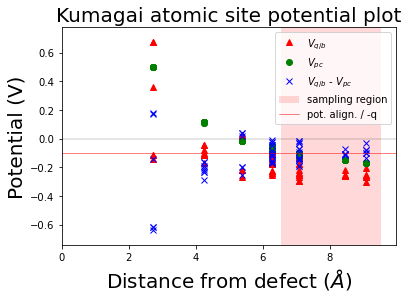

In [6]:
get_correction_kumagai(sdp.defect_entry, epsilon=dielectric, title="Yes")

Check LOCPOT parsing also works:

In [7]:
bulk_file_path = "Examples/Bulk_Supercell/vasp_ncl"
dielectric = np.array([[9.13, 0, 0],[0., 9.13, 0],[0, 0, 9.13]])

for i in os.listdir("Examples"):
    if 'Int_Te' in i:
        print(i)
        defect_file_path = f"Examples/{i}/vasp_ncl"
        defect_charge = int(i[-2:].replace("_",""))

        sdp = parse_calculations.SingleDefectParser.from_paths(defect_file_path, bulk_file_path,
                                            dielectric, defect_charge)
        print(f"Uncorrected energy: {sdp.defect_entry.uncorrected_energy:.3f} eV")
        bo = sdp.freysoldt_loader()
        sdp.get_stdrd_metadata()
        sdp.get_bulk_gap_data()
        sdp.run_compatibility()
        print("Defect entry corrections:")
        print(sdp.defect_entry.corrections)
        print(f"Corrected energy: {sdp.defect_entry.energy:.3f} eV", "\n")

Int_Te_3_2
Uncorrected energy: -7.105 eV
Defect entry corrections:
{'charge_correction': 0.8296154443335331, 'bandfilling_correction': -0.0, 'bandedgeshifting_correction': 0.0}
Corrected energy: -6.275 eV 




Delocalization analysis has indicated that Int_Te_mult128
with charge 2 may not be compatible with the chosen charge correction
scheme, and may require a larger supercell for accurate calculation of the energy. Recommended to
look at the correction plots (i.e. run `get_correction_freysoldt(DefectEntry,...,plot=True)` from
`doped.pycdt.corrections.finite_size_charge_correction`) to visually determine if
charge correction scheme still appropriate, then `sdp.compatibility.perform_freysoldt(DefectEntry)`
to apply it (replace 'freysoldt' with 'kumagai' if using anisotropic correction).
You can also change the DefectCompatibility() tolerance settings via the `compatibility` parameter
in `SingleDefectParser.from_paths()`.


In [8]:
sdp.defect_entry.defect.site

PeriodicSite: Te (12.2688, 12.2688, 8.9972) [0.9375, 0.9375, 0.6875]

In [9]:
bulk_file_path = "Examples/Bulk_Supercell/vasp_ncl"
dielectric = np.array([[9.13, 0, 0],[0., 9.13, 0],[0, 0, 9.13]])

for i in os.listdir("Examples"):
    if "as_1_Te" in i:  # loop folders and parse those with "Int_Te" in name
        defect_file_path = f"Examples/{i}/vasp_ncl"
        defect_charge = int(i[-2:].replace("_", ""))
        # parse with no transformation.json:
        sdp = parse_calculations.SingleDefectParser.from_paths(defect_file_path, bulk_file_path,
                                            dielectric, defect_charge)
        sdp.kumagai_loader()
        sdp.get_stdrd_metadata()
        sdp.get_bulk_gap_data()
        sdp.run_compatibility()
        te_cd_1_ent = sdp.defect_entry


Delocalization analysis has indicated that Sub_Te_on_Cd_mult32
with charge 1 may not be compatible with the chosen charge correction
scheme, and may require a larger supercell for accurate calculation of the energy. Recommended to
look at the correction plots (i.e. run `get_correction_freysoldt(DefectEntry,...,plot=True)` from
`doped.pycdt.corrections.finite_size_charge_correction`) to visually determine if
charge correction scheme still appropriate, then `sdp.compatibility.perform_freysoldt(DefectEntry)`
to apply it (replace 'freysoldt' with 'kumagai' if using anisotropic correction).
You can also change the DefectCompatibility() tolerance settings via the `compatibility` parameter
in `SingleDefectParser.from_paths()`.


In [10]:
te_cd_1_ent.uncorrected_energy

-2.906045809999995

In [11]:
from doped.pycdt.corrections.finite_size_charge_correction import get_correction_kumagai


Final Kumagai correction is 0.157 eV


0.15660728758716663

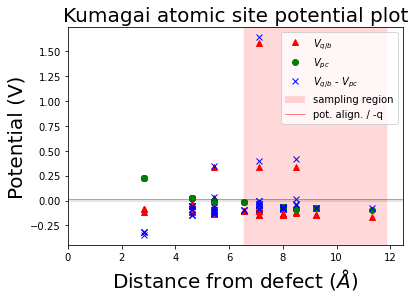

In [12]:
get_correction_kumagai(te_cd_1_ent, epsilon=dielectric, title="Yes")

In [13]:
te_cd_1_ent.parameters["delocalization_meta"]

{'atomic_site': {'is_compatible': False,
  'metadata': {'kumagai_variance_compatible': False,
   'kumagai_variance': 0.09294301805469835,
   'atomic_site_var_tol': 0.025,
   'kumagai_minmax_compatible': False,
   'kumagai_minmax_window': 1.7305803308710235,
   'plnr_avg_minmax_tol': 0.3}},
 'defectsite_relax': {'is_compatible': False,
  'metadata': {'relax_amount': 8.508243533063842,
   'defect_tot_relax_tol': 5.0}},
 'structure_relax': {'is_compatible': False,
  'metadata': {'structure_tot_relax_compatible': False,
   'tot_relax_outside_rad': 123.35803241241373,
   'tot_relax_tol': 5.0,
   'structure_perc_relax_compatible': True,
   'perc_relax_outside_rad': 48.29896430841752,
   'perc_relax_tol': 50.0,
   'full_structure_relax_data': [[2.8333683853583174,
     7.994485511830951,
     55,
     3.1301194000012873],
    [2.8333683853583187, 6.51744690430026, 50, 2.55180736314279],
    [2.8333683853583187, 6.517463657284898, 44, 2.5518139225195187],
    [2.8333683853583187, 9.21364331018